Taller 1:
Nicolas Javier Carreño Perea - 2253404

# Dataset Iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
df_iris = pd.read_csv("../Datasets/IRIS.csv")
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [113]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Comprobar si hay datos nulos

In [114]:
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [115]:
df_iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
values_species = {"species": {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}
df_iris.replace(values_species, inplace=True)
df_iris['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

Graficamos la matriz de correlacion entre variables

<AxesSubplot:>

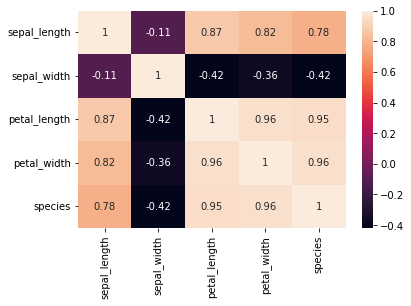

In [29]:
correlation_matrix = df_iris.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

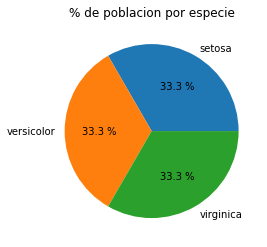

In [42]:
datos = df_iris.species.value_counts(normalize=True)
plt.pie(datos, labels=["setosa","versicolor","virginica"], autopct="%0.1f %%")
plt.title("% de poblacion por especie")
plt.show()

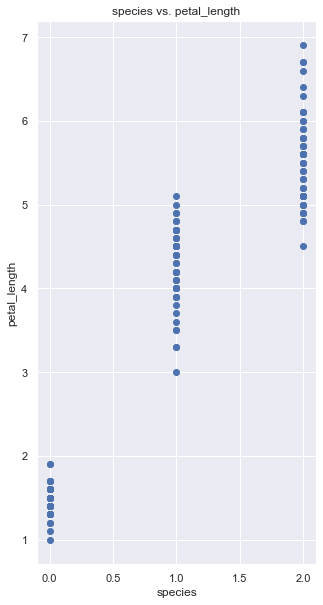

In [54]:
plt.subplots(figsize=(5, 10))
plt.scatter(x=df_iris['species'],y=df_iris['petal_length'])
plt.title('species vs. petal_length')
plt.xlabel('species')
plt.ylabel('petal_length')
plt.show()

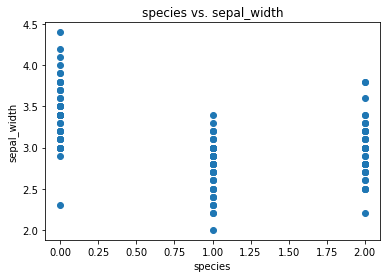

In [5]:
plt.scatter(x=df_iris['species'],y=df_iris['sepal_width'])
plt.title('species vs. sepal_width')
plt.xlabel('species')
plt.ylabel('sepal_width')
plt.show()

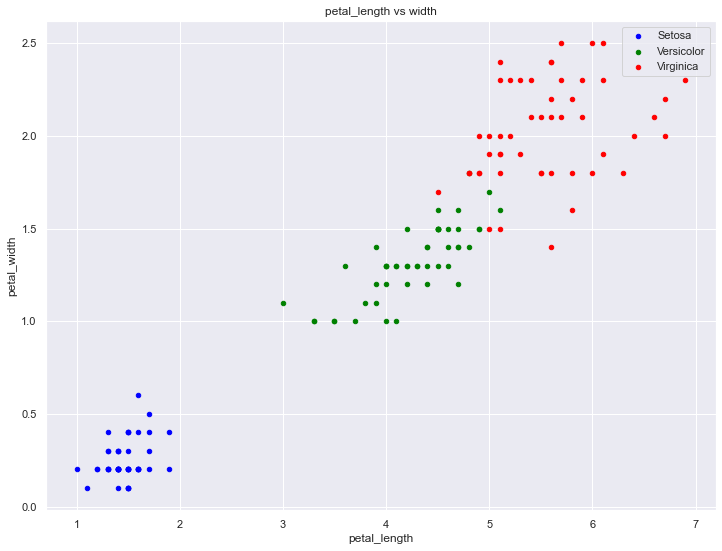

In [124]:
fig = df_iris[df_iris.species == 0].plot(kind='scatter', x='petal_length', y='petal_width', color='blue', label='Setosa')
df_iris[df_iris.species == 1].plot(kind='scatter', x='petal_length', y='petal_width', color='green', label='Versicolor', ax=fig)
df_iris[df_iris.species == 2].plot(kind='scatter', x='petal_length', y='petal_width', color='red', label='Virginica', ax=fig)
fig.set_xlabel('petal_length')
fig.set_ylabel('petal_width')
fig.set_title('petal_length vs width')
plt.show()

Separacion de los conjuntos de datos de entrenamiento y prueba

In [14]:
x = df_iris.drop(columns=['species','sepal_width']) #No se usa sepal_width ya que tiene una correlacion muy baja y puede volver imprecisa la clasificacion
y = df_iris['species']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Iris: Arbol de decision

Instanciar arbol de decision

In [19]:
tree_classifier = DecisionTreeClassifier(max_depth = 4, random_state = 0)

Entrenar el modelo

In [20]:
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
y_test_pred = tree_classifier.predict(x_test)

Puntajes del modelo de clasificacion

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print("----- DECISION TREE RESULTS -----")
print("Accuracy of train: %.3f" % accuracy_score(y_train_pred, y_train))
print("Accuracy of test: %.3f" % accuracy_score(y_test_pred, y_test))
print("Model Accuracy global score: %.3f" % tree_classifier.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]
----- DECISION TREE RESULTS -----
Accuracy of train: 0.990
Accuracy of test: 0.956
Model Accuracy global score: 0.956


## Iris: Regresion logistica

In [22]:
from sklearn.linear_model import LogisticRegression
modelo_iris = LogisticRegression()
modelo_iris.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_train_pred = modelo_iris.predict(x_train)
y_test_pred = modelo_iris.predict(x_test)
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
print("----- LOGISTIC REGRESSION RESULTS -----")
print("Accuracy of train: %.3f" % accuracy_score(y_train_pred, y_train))
print("Accuracy of test: %.3f" % accuracy_score(y_test_pred, y_test))
print("Model Accuracy global score: %.3f" % modelo_iris.score(x_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
----- LOGISTIC REGRESSION RESULTS -----
Accuracy of train: 0.981
Accuracy of test: 0.978
Model Accuracy global score: 0.978


# Dataset Salary

In [87]:
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
df_salary = pd.read_csv("../Datasets/Salary_Data.csv")
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [88]:
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [89]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

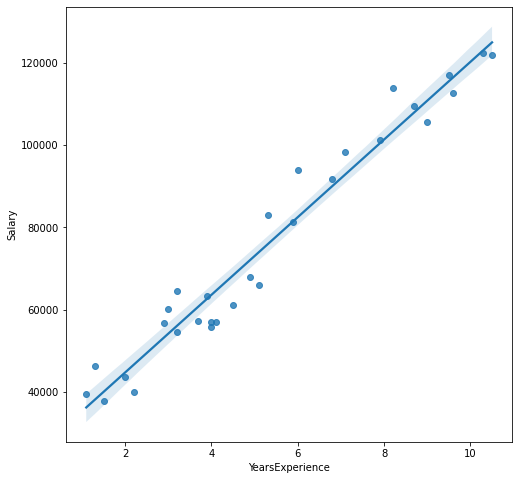

In [90]:
plt.subplots(figsize=(8, 8))
sns.regplot(x="YearsExperience", y="Salary", data=df_salary)

Separamos los datos

In [134]:
x = df_salary['YearsExperience'].array.reshape(-1, 1)
y = df_salary['Salary'].array.reshape(-1, 1)

In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [ ]:
print(x_train)
print(y_train)

Instanciamos y entrenamos el modelo

In [153]:
from sklearn.linear_model import LinearRegression
modelo_sal = LinearRegression()
modelo_sal.fit(x_train,y_train)

LinearRegression()

In [154]:
modelo_sal.predict(x_test)

array([[ 64374.49262392],
       [124811.92649812],
       [103426.3729734 ],
       [110864.82637331],
       [ 82040.81944869],
       [ 63444.68594893],
       [ 41129.32574923],
       [ 65304.29929891],
       [115513.85974824]])

In [156]:
from sklearn.metrics import accuracy_score
print("----- LINEAR REGRESSION RESULTS -----")
print("Model Accuracy global score: %.3f" % modelo_sal.score(x_test,y_test))

----- LINEAR REGRESSION RESULTS -----
Model Accuracy global score: 0.962


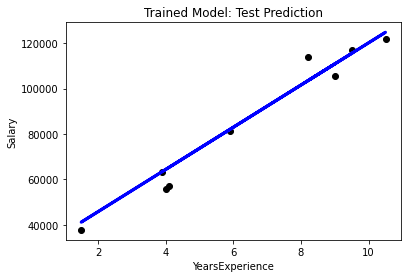

In [157]:
y_test_pred = modelo_sal.predict(x_test)
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.title('Trained Model: Test Prediction')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [159]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("Percentage of error: %f" % (error*100))

Percentage of error: 577193.451918
